<a href="https://colab.research.google.com/github/deelilah/Univariate-Bivariate-Multivariate/blob/master/ip2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [0]:
#import pandas,numpy for analysis and seaborn,matplot lib visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#the inline is used to plot graphs without having to call plt.show()

LOADING THE DATASETS

In [101]:
load_df=pd.read_csv('Financial Dataset - 1.csv')
load_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


DATA INSIGHTS

In [102]:
load_df.shape
#out of the dataset,we have 23524 characteristics and 13 observations
#the observation have one dependent variable and 12 independent variable -physiochemical characteristics

(23524, 13)

In [103]:
load_df.columns.unique()
#column labels

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [104]:
load_df.info()
#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
Has a Bank account        23488 non-null object
Type of Location          23509 non-null object
Cell Phone Access         23513 non-null object
household_size            23496 non-null float64
Respondent Age            23490 non-null float64
gender_of_respondent      23490 non-null object
The relathip with head    23520 non-null object
marital_status            23492 non-null object
Level of Educuation       23495 non-null object
Type of Job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


SUMMARY STATISTICS

In [105]:
load_df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


TARGET VARIABLE

In [106]:
load_df.household_size.unique()

array([ 3.,  5.,  8.,  7.,  1.,  6.,  4., 10.,  2., 11.,  9., 12., 16.,
       15., 13., 14., 21., nan,  0., 18., 17., 20.])

In [107]:
load_df['Respondent Age'].unique()

array([ 24.,  70.,  26.,  34.,  32.,  42.,  54.,  76.,  40.,  69.,  64.,
        31.,  38.,  47.,  27.,  48.,  25.,  21.,  18.,  22.,  58.,  55.,
        62.,  29.,  35.,  45.,  67.,  19.,  80.,  66.,  50.,  33.,  28.,
        51.,  16.,  17.,  30.,  37.,  59.,  65.,  46.,  56.,  52.,  23.,
        43.,  49.,  44.,  72.,  53.,  63.,  39.,  81.,  78.,  36.,  20.,
        60.,  95.,  71.,  57.,  85.,  68.,  41.,  61.,  75.,  86.,  73.,
        nan,  93.,  74.,  88.,  90.,  77.,  84.,  82.,  89.,  79.,  83.,
        94.,  87.,  92.,  91.,  98.,  97.,  96.,  99., 100.])

In [108]:
load_df.household_size.value_counts()

2.0     5132
1.0     3967
3.0     3535
4.0     3211
5.0     2727
6.0     2031
7.0     1383
8.0      741
9.0      356
10.0     192
12.0      66
11.0      66
0.0       36
13.0      25
15.0      11
14.0       9
16.0       4
18.0       1
20.0       1
21.0       1
17.0       1
Name: household_size, dtype: int64

REMOVE ANOMALIES

In [109]:
df1=load_df.columns.str.strip()
df1

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

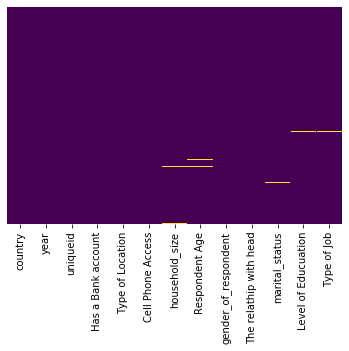

In [110]:
#missing values

sns.heatmap(load_df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')





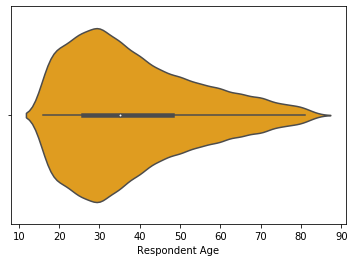

In [111]:
sns.violinplot(x='Respondent Age',data=df4,color='orange')

In [112]:
#check for outliers
Q1 = load_df.quantile(0.25)
Q3 = load_df.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

year               2.0
household_size     3.0
Respondent Age    23.0
dtype: float64


In [113]:

print((load_df < (Q1 - 1.5 * IQR)) |(load_df > (Q3 + 1.5 * IQR)))

       Cell Phone Access  Has a Bank account  ...  uniqueid   year
0                  False               False  ...     False  False
1                  False               False  ...     False  False
2                  False               False  ...     False  False
3                  False               False  ...     False  False
4                  False               False  ...     False  False
...                  ...                 ...  ...       ...    ...
23519              False               False  ...     False  False
23520              False               False  ...     False  False
23521              False               False  ...     False  False
23522              False               False  ...     False  False
23523              False               False  ...     False  False

[23524 rows x 13 columns]


In [114]:
#drop outliers


df2= load_df[~((load_df < (Q1 - 1.5 * IQR)) |(load_df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(df2.shape)

(22903, 13)


In [115]:
df2.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            27
Respondent Age            33
gender_of_respondent      33
The relathip with head     4
marital_status            31
Level of Educuation       29
Type of Job               30
dtype: int64

In [116]:
df3=df2.dropna()
df3

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23512,Uganda,2018,uniqueid_2102,No,Rural,No,2.0,57.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income


In [117]:
df3.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [118]:
df4=df3.drop_duplicates()
df4

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23512,Uganda,2018,uniqueid_2102,No,Rural,No,2.0,57.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income


CHECK CORRELATION


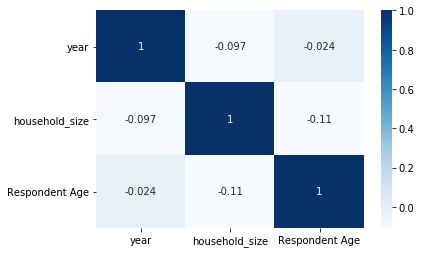

In [119]:
plt.figure(figsize=(6,4))
sns.heatmap(df4.corr(),cmap='Blues',annot=True)


#Dark shades represents positive correlation while lighter shades represents negative correlation.
#If you set annot=True, you'll get values by which features are correlated to each other in grid-cells

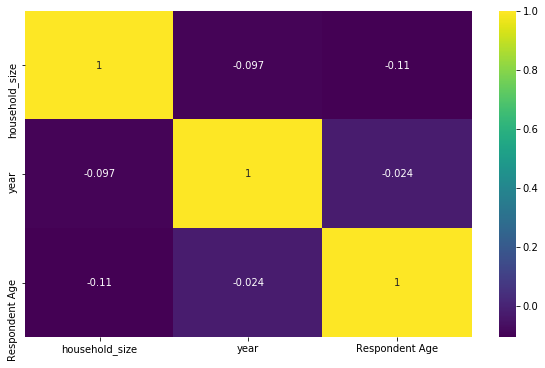

In [120]:
#Quality correlation matrix
k = 13 #number of variables for heatmap
cols = df4.corr().nlargest(k, 'household_size')['household_size'].index
cm = df4[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

Distribution Plot(size of household ,age)


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


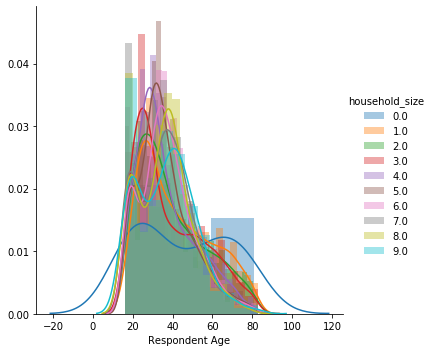

In [121]:
sns.FacetGrid(df4,hue='household_size',size = 5).map(sns.distplot,'Respondent Age').add_legend()
#In the analysis above we can tell number of house holdsize contains people of age 20-40 .....more 30

CDF AND PDF


pdf [0.15485149 0.18952695 0.19806381 0.12074807 0.09958196 0.08444444
 0.05249725 0.04558856 0.03639164 0.01830583]
bin-edges [16.  22.7 29.4 36.1 42.8 49.5 56.2 62.9 69.6 76.3 83. ]


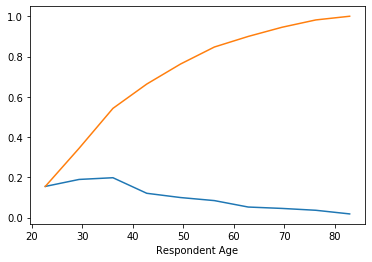

In [122]:
counts,bin_edges=np.histogram(df4['Respondent Age'],bins=10,density=True)

plt.xlabel('Respondent Age')
pdf=counts/(sum(counts))
print('pdf',pdf)
print('bin-edges',bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf)


In [123]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22725 entries, 0 to 23522
Data columns (total 13 columns):
country                   22725 non-null object
year                      22725 non-null int64
uniqueid                  22725 non-null object
Has a Bank account        22725 non-null object
Type of Location          22725 non-null object
Cell Phone Access         22725 non-null object
household_size            22725 non-null float64
Respondent Age            22725 non-null float64
gender_of_respondent      22725 non-null object
The relathip with head    22725 non-null object
marital_status            22725 non-null object
Level of Educuation       22725 non-null object
Type of Job               22725 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.4+ MB


Central Frequency


In [124]:
df4['household_size'].mean()


3.57984598459846

In [125]:
df4["household_size"].median()

3.0

In [126]:
df4["Respondent Age"].mode()

0    30.0
dtype: float64

In [127]:
df4.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [128]:
pd.DataFrame(df4.country.value_counts())

,country
Rwanda,8512
Tanzania,6424
Kenya,5868
Uganda,1921


In [129]:
pd.DataFrame(df4.marital_status.value_counts())

,marital_status
Married/Living together,10431
Single/Never Married,7748
Widowed,2509
Divorced/Seperated,2029
Dont know,8


In [130]:
d2=df4.rename(columns={'Has a Bank account':'Has_a_bank_account','Type of Location':'Location','Cell Phone Access':'Cell_phone_access','Respondent Age':'Respondant_Age','The relathip with head':'rel_head','Level of Educuation':'Level_of_Educuation','Type of Job':'Type_of_job'})
d2

,country,year,uniqueid,Has_a_bank_account,Location,Cell_phone_access,household_size,Respondant_Age,gender_of_respondent,rel_head,marital_status,Level_of_Educuation,Type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23512,Uganda,2018,uniqueid_2102,No,Rural,No,2.0,57.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income


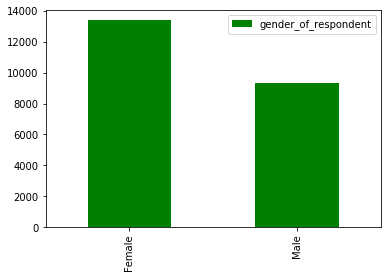

In [131]:
df7=pd.DataFrame(d2.gender_of_respondent.value_counts())
df7.plot(kind='bar',color='green')




Text(0, 0.5, 'Bank Accounts')

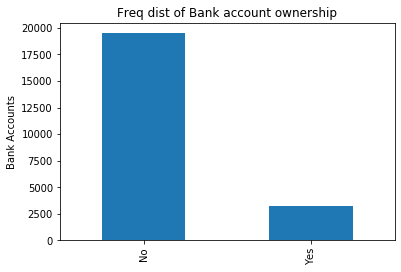

In [132]:

#visualisation of bank account ownership count.
d2['Has_a_bank_account'].value_counts().plot.bar(title='Freq dist of Bank account ownership', )
plt.ylabel('Bank Accounts')
#From the numbers it is clear we are yet to achieve financial inclusion.

Text(0, 0.5, 'Bank Accounts')

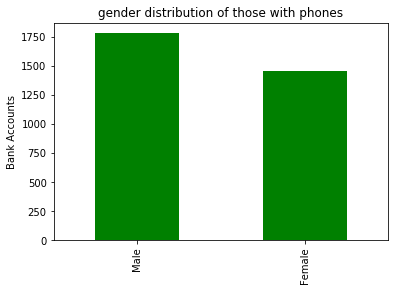

In [133]:
#a visualisation to see gender distibution of those with phones.
#a new dataframe is created where df2['Has a Bank account'] == 'Yes'
a=d2[d2['Has_a_bank_account'] == 'Yes']
a['gender_of_respondent'].value_counts().plot.bar(title='gender distribution of those with phones', color='green')
plt.ylabel('Bank Accounts')
# out of those with phones males are more than females.

Text(0, 0.5, 'Bank Accounts')

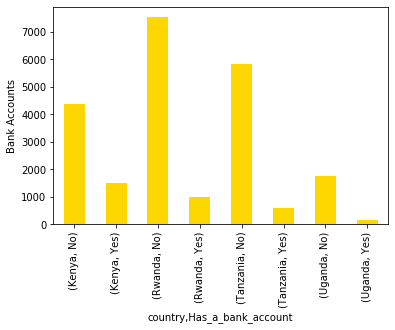

In [134]:
#A visualisation to check Bank account ownership in the country.
b=d2.groupby (['country','Has_a_bank_account'])['Has_a_bank_account'].count()
b.plot(kind='bar', color='gold')
plt.ylabel('Bank Accounts')

Text(0, 0.5, 'Bank Accounts')

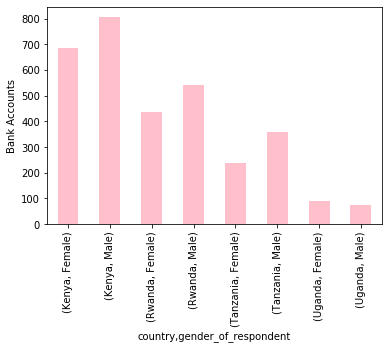

In [135]:
#A visualisation to check Bank account onwnership in the countries given gender.
b=a.groupby (['country','gender_of_respondent'])['Has_a_bank_account'].count()
b.plot(kind='bar', color='pink')
plt.ylabel('Bank Accounts')
#In all countries more males have a bank account except in Uganda, where more feemales have
#bank accounts compared to males

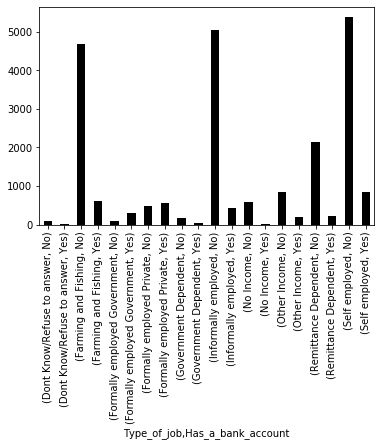

In [136]:
#the type of job and if the person has a bank account
df8=d2.groupby (['Type_of_job','Has_a_bank_account'])['Has_a_bank_account'].count()
df8.plot(kind='bar',  color='black')

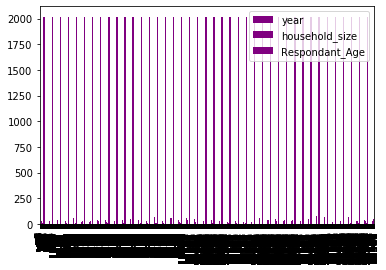

In [137]:
d19=d2.groupby (['marital_status','Has_a_bank_account'])['Has_a_bank_account'].count()
d19=d2.plot(kind='bar',  color='purple')

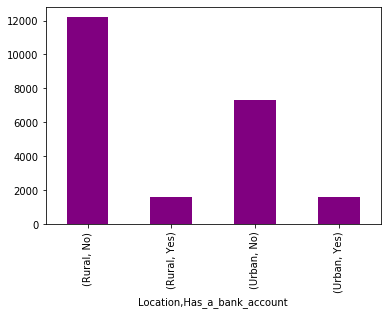

In [138]:
#the location and if the person has a bank account
d9=d2.groupby (['Location','Has_a_bank_account'])['Has_a_bank_account'].count()
d9.plot(kind='bar',  color='purple')

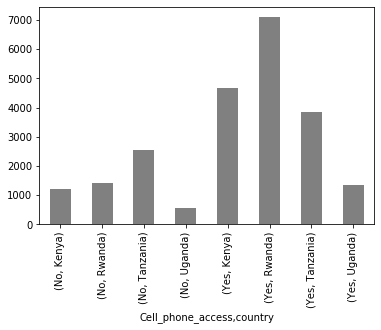

In [139]:
#the type of job and if the person has a bank account
d10=d2.groupby (['Cell_phone_access','country'])['Has_a_bank_account'].count()
d10.plot(kind='bar',  color='grey')

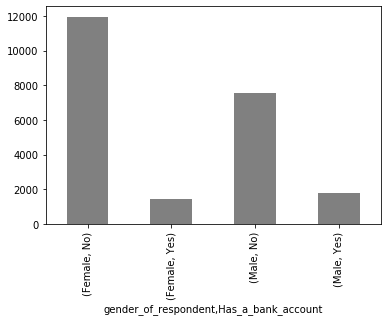

In [140]:
d10=d2.groupby (['gender_of_respondent','Has_a_bank_account'])['Has_a_bank_account'].count()
d10.plot(kind='bar',  color='grey')

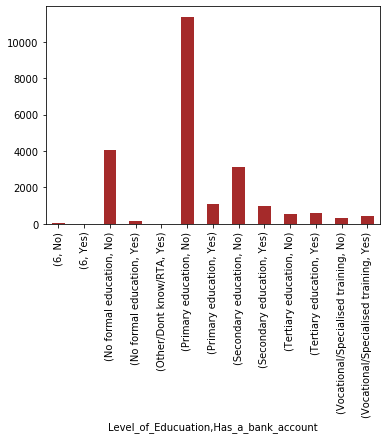

In [141]:
d10=d2.groupby (['Level_of_Educuation','Has_a_bank_account'])['Has_a_bank_account'].count()
d10.plot(kind='bar',  color='brown')

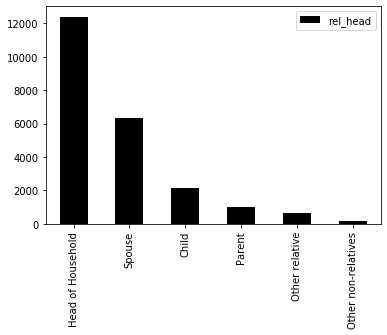

In [142]:
df9=pd.DataFrame(d2.rel_head .value_counts())
df9.plot(kind='bar',  color='black')

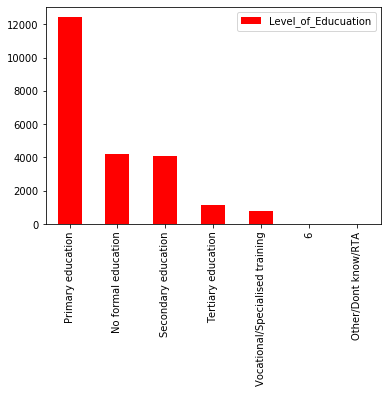

In [143]:
df10=pd.DataFrame(d2.Level_of_Educuation.value_counts())
df10.plot(kind='bar',color='red')

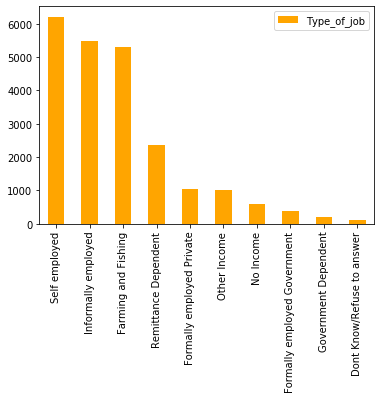

In [144]:
df11=pd.DataFrame(d2.Type_of_job.value_counts())
df11.plot(kind='bar',color='orange')

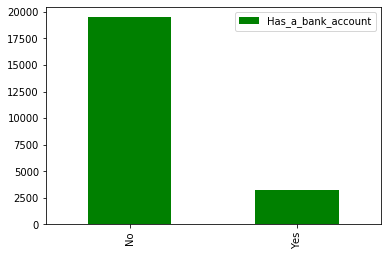

In [145]:
df14=pd.DataFrame(d2.Has_a_bank_account.value_counts())
df14.plot(kind='bar',color='green')

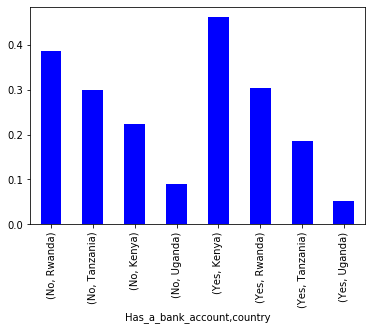

In [146]:
bybank=d2.groupby('Has_a_bank_account').country.value_counts(normalize=True)
bybank.plot(kind='bar',color='blue')


In [147]:
bygen=d2.groupby('gender_of_respondent').Has_a_bank_account.value_counts(normalize=True)
bygen

gender_of_respondent  Has_a_bank_account
Female                No                    0.891543
                      Yes                   0.108457
Male                  No                    0.808962
                      Yes                   0.191038
Name: Has_a_bank_account, dtype: float64

In [0]:
# df6['Respondant_Age']=pd.cut(df6.Respondant_Age,[10,20,30,40,50,60,70,80,90],labels=['10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90'])


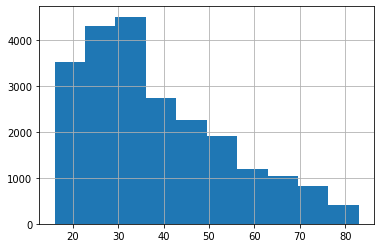

In [148]:
d2['Respondant_Age'].hist()

In [0]:
# byage=df6.groupby(['Respondant_Age','country']).Has_a_bank_account.value_counts(normalize=True)
# byage

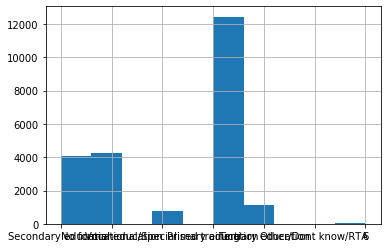

In [150]:
d2['Level_of_Educuation'].hist()

In [0]:
#Preprocessing
#divide the dataset into a feature set and corresponding labels
X = d2.iloc[:, 6:-5].values
#y = d2[['country',	'year',	'uniqueid',	'Has a Bank account',	'Type of Location',	'Cell Phone Access','gender_of_respondent'	,'The relathip with head'	,'marital_status','Level of Educuation'	,'Type of Job']].values
y=d2['gender_of_respondent']

In [152]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test

(array([[ 2., 29.],
        [ 1., 23.],
        [ 8., 45.],
        ...,
        [ 6., 52.],
        [ 4., 16.],
        [ 6., 26.]]), array([[ 6., 30.],
        [ 5., 39.],
        [ 3., 65.],
        ...,
        [ 3., 20.],
        [ 5., 35.],
        [ 9., 35.]]), 20265    Female
 20845    Female
 21432    Female
 12659      Male
 16087    Female
           ...  
 13500    Female
 20232    Female
 10127      Male
 11097      Male
 2834       Male
 Name: gender_of_respondent, Length: 18180, dtype: object, 7808     Female
 10042      Male
 18864    Female
 22049    Female
 8447     Female
           ...  
 5041     Female
 9572     Female
 12695      Male
 7290       Male
 5482       Male
 Name: gender_of_respondent, Length: 4545, dtype: object)

In [0]:
#Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Applying PCA

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [169]:
#Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.5, 0.5])

In [0]:
#Using 2 Principal Component Analysis
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [171]:
#Training and Making Predictions
#we use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [172]:
#Performance Evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test, y_pred))
print('Accuracy' + str(accuracy_score(y_test, y_pred)))


[[2706   42]
 [1747   50]]
Accuracy0.6063806380638064


In [0]:
#Preprocessing
#divide the dataset into a feature set and corresponding labels
A = d2.iloc[:, 6:-5].values
#b = df2[['country',	'year',	'uniqueid',	'Has a Bank account',	'Type of Location',	'Cell Phone Access','gender_of_respondent'	,'The relathip with head'	,'marital_status','Level of Educuation'	,'Type of Job']].values
b=d2['gender_of_respondent']

In [174]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=0)
A_train, A_test, b_train, b_test

(array([[ 2., 29.],
        [ 1., 23.],
        [ 8., 45.],
        ...,
        [ 6., 52.],
        [ 4., 16.],
        [ 6., 26.]]), array([[ 6., 30.],
        [ 5., 39.],
        [ 3., 65.],
        ...,
        [ 3., 20.],
        [ 5., 35.],
        [ 9., 35.]]), 20265    Female
 20845    Female
 21432    Female
 12659      Male
 16087    Female
           ...  
 13500    Female
 20232    Female
 10127      Male
 11097      Male
 2834       Male
 Name: gender_of_respondent, Length: 18180, dtype: object, 7808     Female
 10042      Male
 18864    Female
 22049    Female
 8447     Female
           ...  
 5041     Female
 9572     Female
 12695      Male
 7290       Male
 5482       Male
 Name: gender_of_respondent, Length: 4545, dtype: object)

In [0]:
#Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
A_train = sc.fit_transform(A_train)
A_test = sc.transform(A_test)

In [0]:
#performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
A_train = lda.fit_transform(A_train, b_train)
A_test = lda.transform(A_test)

In [177]:
#Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(A_train, b_train)
b_pred = classifier.predict(A_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [178]:
#Evaluating the Performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(b_test, b_pred))
print('Accuracy' + str(accuracy_score(b_test, b_pred)))

[[2692   56]
 [1743   54]]
Accuracy0.6041804180418042


RECOMMENDATIONS

The financial investment in different countries that is Kenya,Rwanda ,Uganda and Tanzania which is simingly low due ti the following analysis.









In [0]:
#Most households comprise of people of the age 30 and ,most are located in the urban region of the countries who have cellphones but with no bank accounts.The recommendation would be through mobile banking this will increase the individuals with bank accounts.
#Kenya has the highest number of people with bank accounts.Bank managers in other countries can do benchmarking from the kenyan banking sector.
#due to the increased number of people with no bank accounts in the rural region,maybe education on the importance of having bank accounts should be done in the rural area